### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:


The explanations of sensor measurements and their brief statistics are given below.


Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['gas_turbines.csv']))

In [5]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
df.shape

(15039, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
len(df)

15039

In [10]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.duplicated().sum()

0

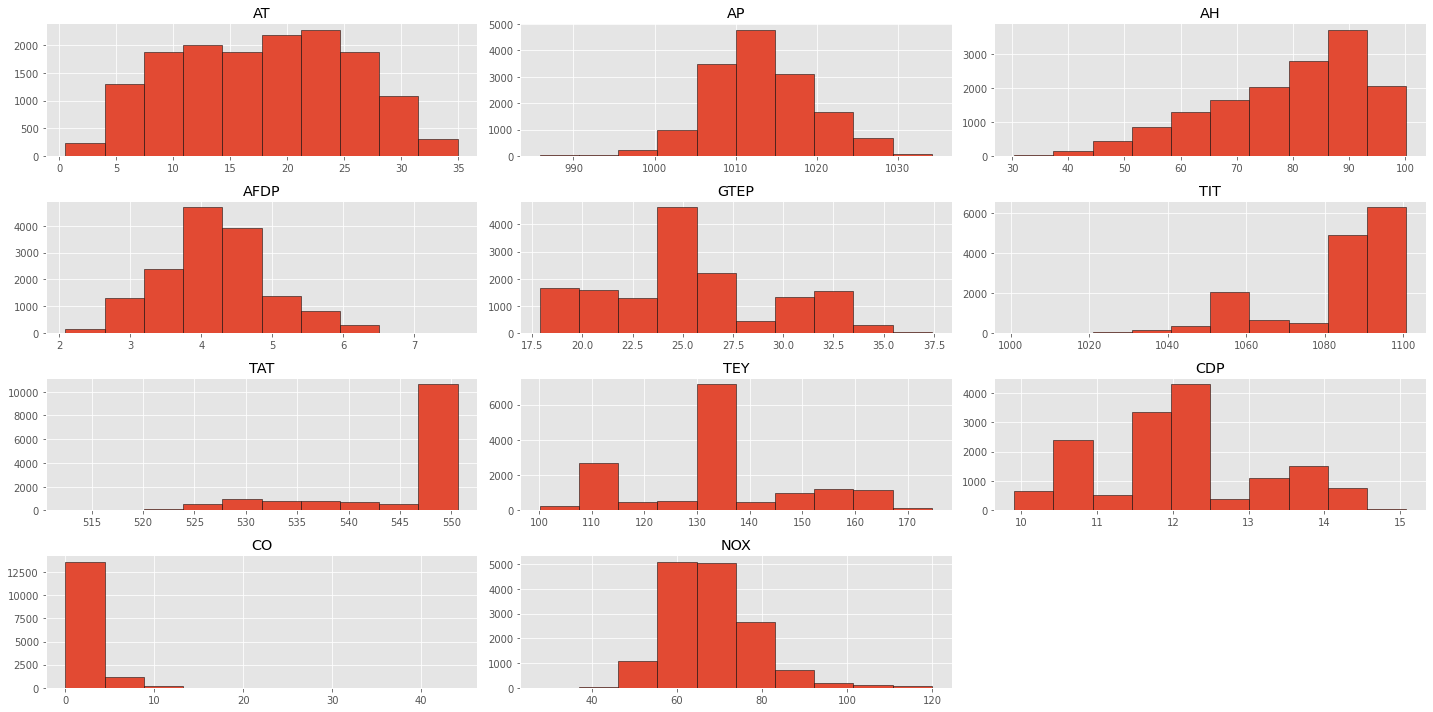

In [13]:
df.hist(edgecolor='k',figsize=(20,10))
plt.tight_layout();

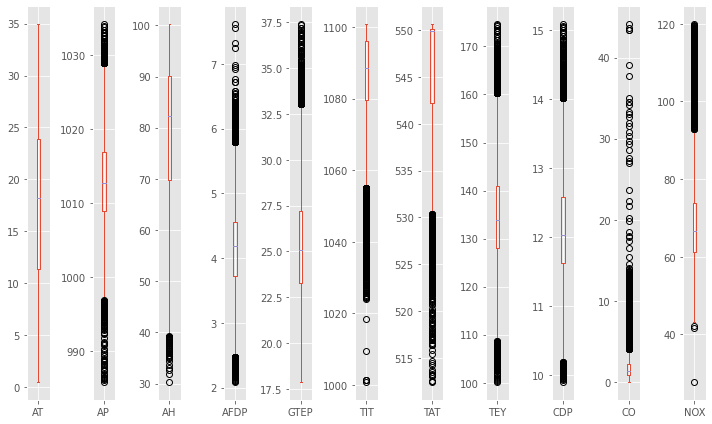

In [14]:
df.plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

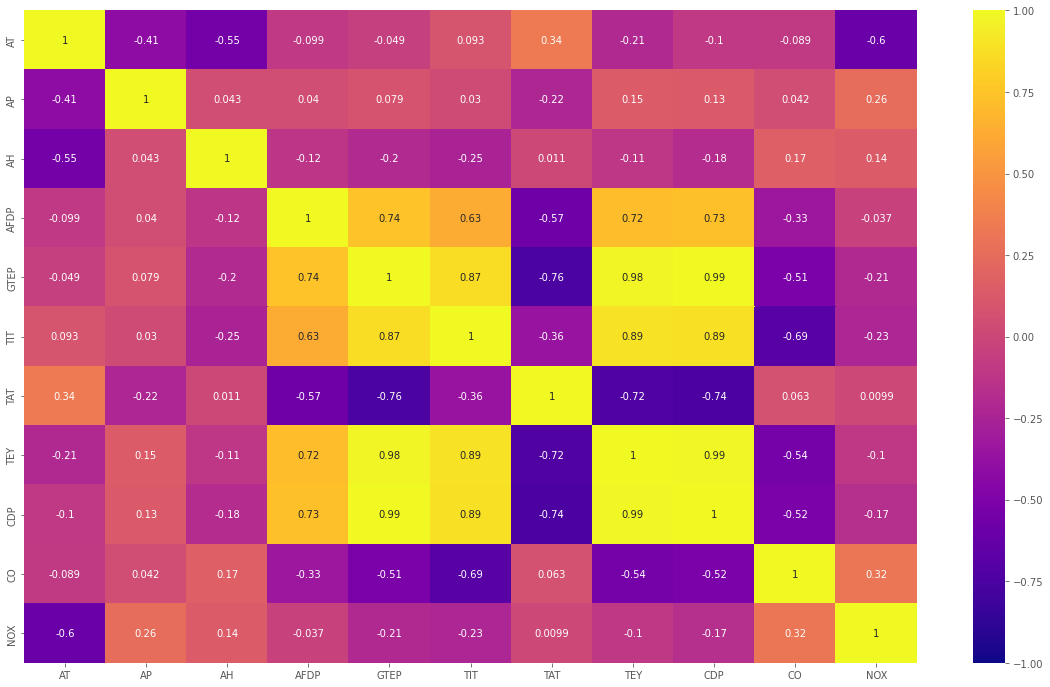

In [15]:
correlation = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,cmap='plasma',
           annot=True);

<font color='magenta'><b><I>Air filter difference pressure(AFDP) is positively correlated with Compressor discharge pressure(CDP), Turbine inlet temperature(TIT) and Gas turbine exhaust pressure(GTEP) and also the target variable Turbine energy yield(TEY).

<font color='magenta'><b><I>Gas turbine exhaust pressure(GTEP) has positive correlation with Turbine inlet temperature(TIT) and is highly positively correlated with Compressor discharge pressure(CDP). Has positive correlation with the target variable Turbine energy yield(TEY) also. GTEP has negative correlation with carbon monoxide(CO) to some extent. 

<font color='magenta'><b><I>TIT has negative correlation with CO and has high positive correlation with CDP, GTEP and AFDP and the target variable TEY.

<font color='magenta'><b><I>Turbine after temperature(TAT) has negative correlation with CDP, GTEP and AFDP and the target variable TEY.

<font color='magenta'><b><I>The target variable TEY has positive correlation with CDP, GTEP, TIT and AFDP and has negative correlation with CO and TAT.

<Figure size 1440x1440 with 0 Axes>

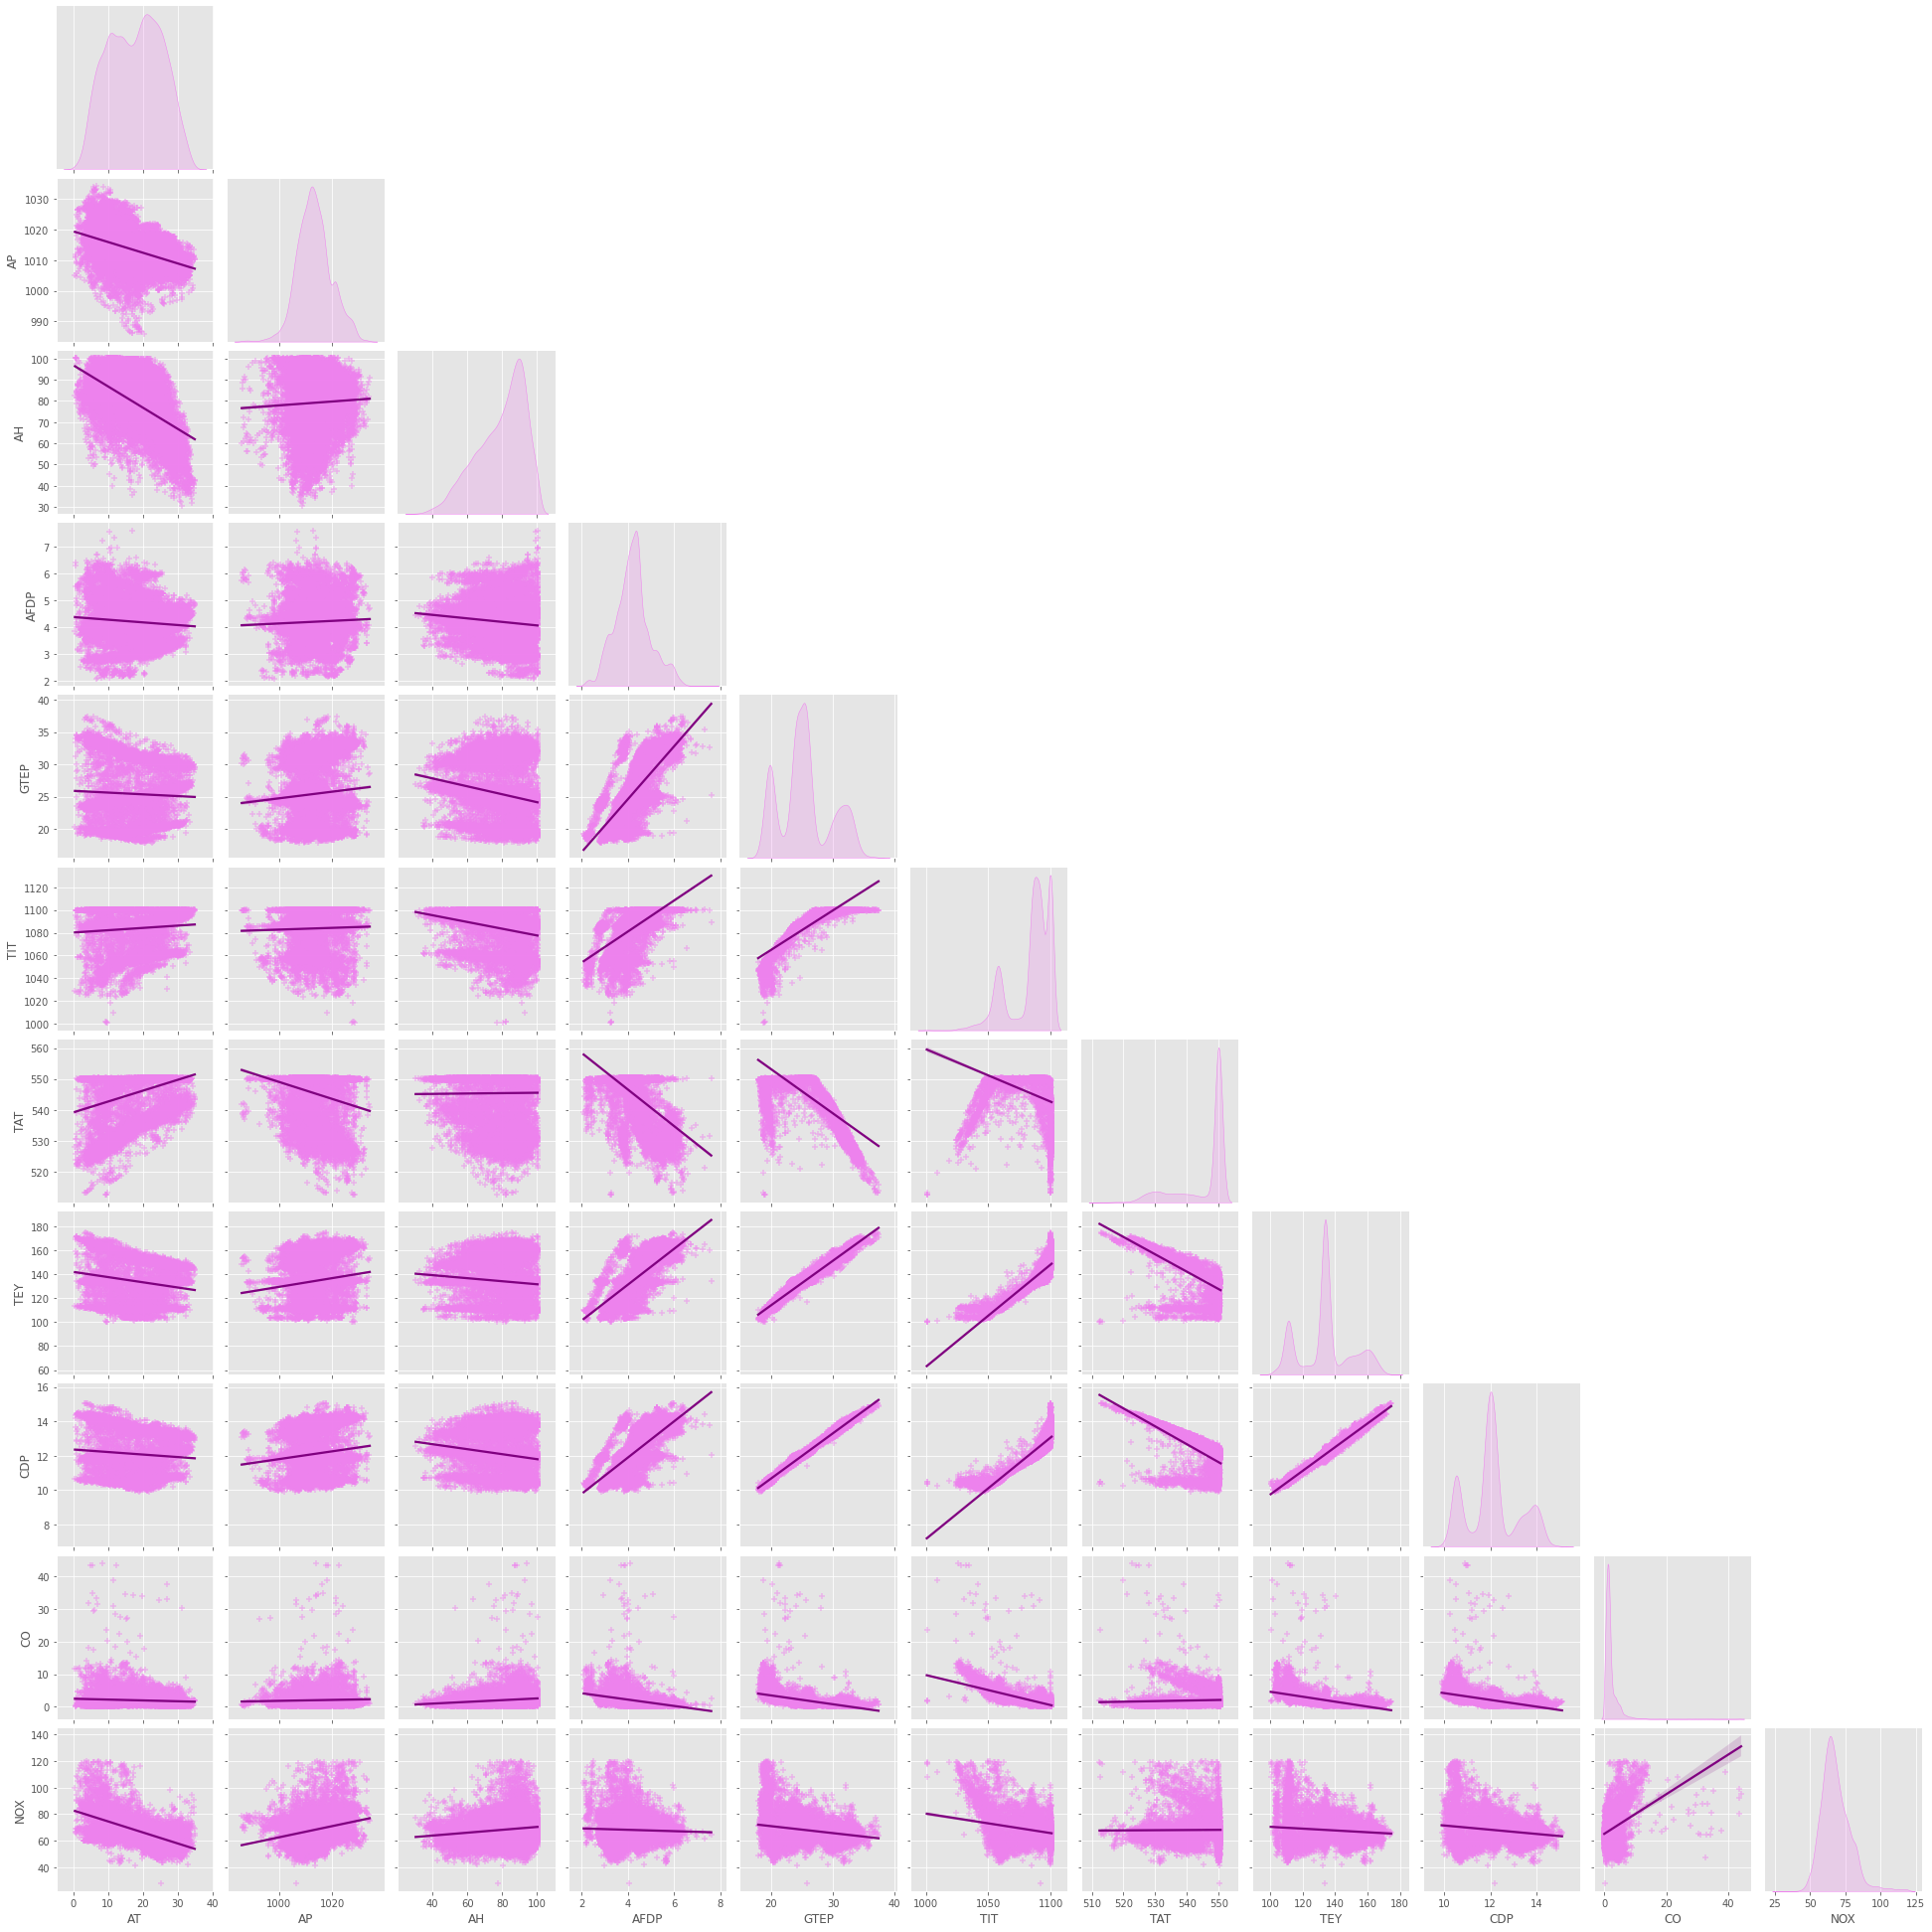

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(df,markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'purple'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'violet'}},
               corner=True,
                 diag_kws= {'color': 'violet'})

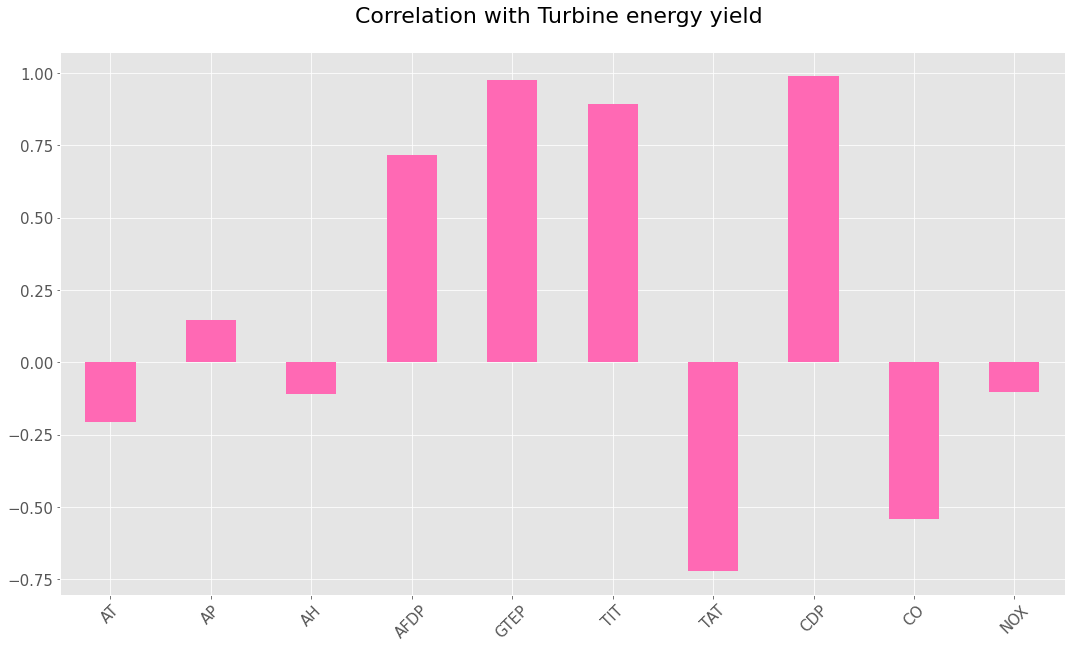

In [17]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'hotpink',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif");

In [18]:
# Dropping those features that have very little correlation with the target variable

df2 = df.copy()
df2 = df2.drop(['AP','AH','NOX'],axis=1)
df2.head(3)

,AT,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,6.8594,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012


In [19]:
df2.shape

(15039, 8)

### <font color='maroon'><b>Split into Independent and Dependent variables :

In [20]:
x = df2.drop(['TEY'],axis=1)
y = df2['TEY']

In [21]:
x.head(2)

,AT,AFDP,GTEP,TIT,TAT,CDP,CO
0,6.8594,3.5000,19.663,1059.2,550.0,10.605,3.1547
1,6.7850,3.4998,19.728,1059.3,550.0,10.598,3.2363


### <font color='maroon'><b>Train Test Split :

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [24]:
print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (12031, 7)
Shape of y_train= (12031,)
Shape of x_test= (3008, 7)
Shape of y_test= (3008,)


### <font color='maroon'><b>Feature Scaling :

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

## <font color='purple'><b>Neural Network :

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems

In [36]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [37]:
ann.fit(x=x_train_scl, y=y_train, epochs=100, batch_size=32,validation_data=(x_test_scl,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
376/376 [==============================] - 2s 3ms/step - loss: 17275.1465 - val_loss: 14430.5283
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 8896.1729 - val_loss: 3910.4163
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 1819.0629 - val_loss: 796.5230
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 495.1895 - val_loss: 373.0980
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 300.3003 - val_loss: 275.2872
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 240.1763 - val_loss: 228.6152
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 203.4457 - val_loss: 194.9192
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 173.2447 - val_loss: 165.8569
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 145.9366 - val_loss: 138.9120
Epoch 10/100
376/376 [==========================

In [38]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,17275.146484,14430.528320
1,8896.172852,3910.416260
2,1819.062866,796.523010
3,495.189484,373.097992
4,300.300323,275.287170
5,240.176270,228.615219
6,203.445709,194.919174
7,173.244705,165.856857
8,145.936584,138.912033
9,120.845329,114.013496


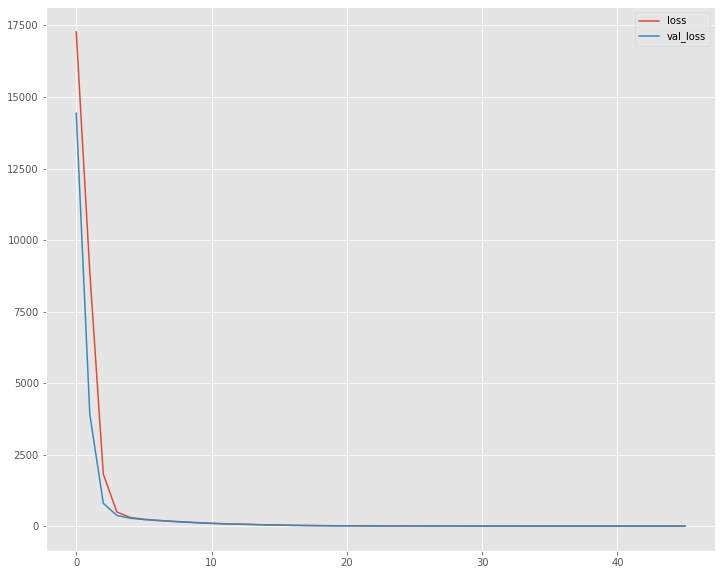

In [39]:
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

<font color='peach'><b>From the fig. the deep learning model is performing well.

In [40]:
ann.evaluate(x_train_scl,y_train)

376/376 [==============================] - 1s 2ms/step - loss: 0.6575


0.6574969291687012

In [41]:
ann.evaluate(x_test_scl,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.6375


0.6375226974487305

In [44]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.5960251914693953
MSE: 0.6375226070663682
RMSE: 0.7984501281021679


Text(0, 0.5, 'Actual Values')

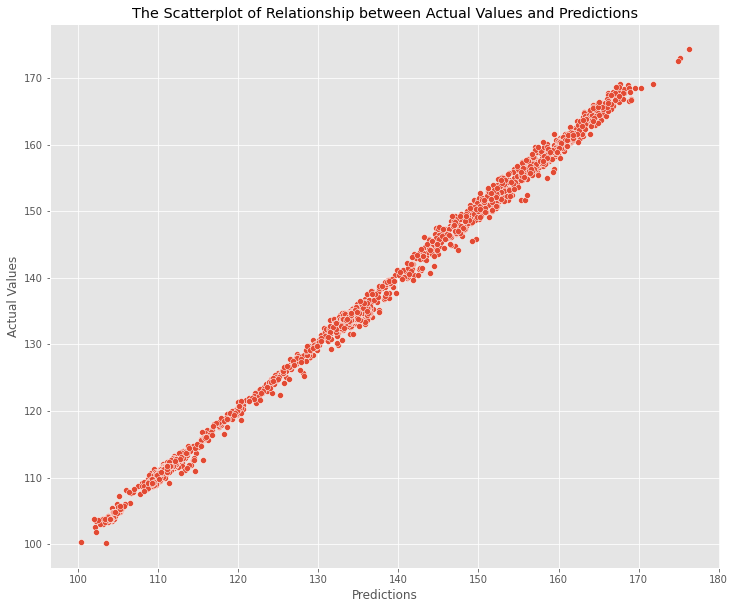

In [43]:
plt.figure(figsize=(12,10))
sns.scatterplot(np.ravel(predictions),y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")